# Machine learning project

**Content**

1. [Definition](#definition)
2. [Data Analysis](#data_analysis)
3. [Functions for data processing](#functions)
4. [Data visualisation and pre-processing](#visualization)
5. [Model creation and applying](#models)
6. [Conclusions](#conclusions)

## 1. Definition <a class='anchor' id='definition'>

### Overview

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data


Main goal of this contest was predict price of appartment based, on set of features which characterizes these appartments.

### Problem statement

In the current project price of appartment from test dataset is going to be predicted.
There are several models of different types will be created and then their results will be compared to found the most optimal model which fit best for Price prediction.

Price prognosos is the regression question and target variable has continiuous range of values. 
When counting parameters of existing appartments we are going to predict price for other appartments described by the same set of features.

Main goal: Find the model which will be able predict value of target variable for each new object.
Quality of prediction will be R2 score.

### Metrics

There are three metrics which can be used for regression tasks.

- Mean_absolute_error
- Mean Square Error
- R2_score

Quality of model will be verified based on R2 score which should be close to 1.0 as close as it is possible.

### Model selection

For the current tasks following models will be applied for comparing of results:
- Cat Boost

### Modules import

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, RepeatedKFold

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.linear_model import Lasso, Ridge

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
from random import randint, random

In [14]:
# garbage collector
import gc 

In [15]:
from catboost import CatBoostRegressor

Creation of empty dataframe for result storing

In [16]:
result = pd.DataFrame(columns=['Model_type','data_proprocessing','R2_score', 'MAE', 'MSE'], dtype = object)

## 2. Data analysis <a class='anchor' id='data_analysis'>

### Data Preparation

Dataset which is used in the current task was taken from kaggle contest.
https://www.kaggle.com/c/realestatepriceprediction/data

Id columns will be used as index because this field should be unique and does not any valueable information for prediction process.

In [17]:
df = pd.read_csv("D:\\Learning\\GeekBrains\\numpy and pandas\\Final project\\train.csv", index_col='Id' )

In [18]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Data fields/Features
- Id - id of appartment
- DistrictId - id of district where appartment is
- Rooms - number of rooms in apartment
- Square - area of appartment
- LifeSquare - value of life square of appartment
- KitchenSquare - value of kitchen square of appartment
- Floor - floor where appartment is.
- HouseFloor - number of floors of the house.
- HouseYear - year where house was built.
- Ecology_1, Ecology_2, Ecology_3 - ecological features of region
- Social_1, Social_2, Social_3 - social features of region
- Healthcare_1, Helthcare_2 - features of reagion related to healthcare
- Shops_1, Shops_2 - features which describe existiong of shops, trade centers etc nearby
- Price - target value. Price of appartment

In [19]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [20]:
df.shape

(10000, 19)

In [21]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


The most of fields have anomalies and outliers.

Distribution of target variable:

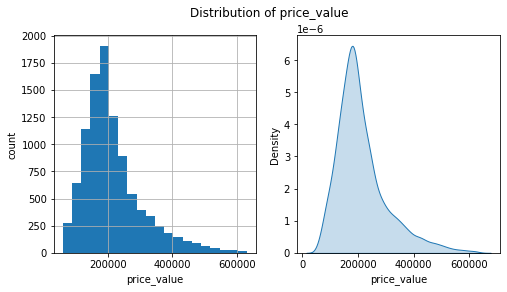

In [22]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price_value')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price_value')

plt.suptitle('Distribution of price_value')
plt.show()

In [23]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Dispersion of target variable is closed to normal, non-symmetrical. 

It looks like that changes or processing of target variable Price is not required.

### Columns with null data

In [88]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

'LifeSquare' and 'Healthcare_1' columns contains a lot of null data.

Training dataset contains 10000 entries.

So persent of missing data for 'LifeSquare' is 21.13 ad for Healthcare_1 is 47.98.

#### Columns with anomalies/outliers

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


In [26]:
df[(df['KitchenSquare'] > df['Square']) | (df['LifeSquare'] > df['Square'])].count()

DistrictId       486
Rooms            486
Square           486
LifeSquare       486
KitchenSquare    486
Floor            486
HouseFloor       486
HouseYear        486
Ecology_1        486
Ecology_2        486
Ecology_3        486
Social_1         486
Social_2         486
Social_3         486
Healthcare_1     170
Helthcare_2      486
Shops_1          486
Shops_2          486
Price            486
dtype: int64

Amount of columns where floor value exceeds general amount of floor.

In [27]:
df[df['Floor'] > df['HouseFloor']].count()

DistrictId       1825
Rooms            1825
Square           1825
LifeSquare       1210
KitchenSquare    1825
Floor            1825
HouseFloor       1825
HouseYear        1825
Ecology_1        1825
Ecology_2        1825
Ecology_3        1825
Social_1         1825
Social_2         1825
Social_3         1825
Healthcare_1      861
Helthcare_2      1825
Shops_1          1825
Shops_2          1825
Price            1825
dtype: int64

Data for cases above will be transformed in the next sections.

#### Categorial variables

The most part of columns contains numerical data, but three of them have object/category data type:
- Ecology_2 
- Ecology_3
- Shops_2 

During further processing object datatypes will be changed to their numerical equivalents.

In [28]:
df.select_dtypes(include=['object', 'category'])

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B
...,...,...,...
77,B,B,B
6159,B,B,A
5123,B,B,A


Changing of datatypes and converting of columns is not required.

## 3. Functions for data processing <a class='anchor' id='functions'>

This section contains functions which can be used in next sections to simplify performing of some operations.

In [29]:
def evaluate_preds(true_values, pred_values, save=False):
    """Evaluation of model quality preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mean_squared_error(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mean_squared_error(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # line where true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [237]:
class Data_preprocessing():
    def __init__(self):
        # Treshold values.
        self.min_rooms_trsh = 1
        self.max_rooms_trsh = 5
        
        self.min_sq_trsh = 20
        self.max_sq_trsh = 300
        
        self.min_kitchen_trsh = 3        
        self.max_kitchen_trsh = 100
        
        self.min_ls_trsh = 5
        self.max_ls_trsh = 250
        
        self.extra_square = 3 #probably, betterr to exclude....
        
        #median values intializing
        self.kc_median = None
        self.ls_median = None
        self.yr_median = None
        self.hf_median = None
        self.rm_median = None
        
        #temporary dataframes for validation processing
        df_prices_district = None
        
        #functions that transforms dataset and add new data
    def median_calculation(self, dfr):
        """Function calculates median values and then these values can be used for gaps filling"""
        # all changes for dataframe in this function were made according to feature analysis in section 4
        # median values for dataframes. Median values will be used for data preprocessing and gaps filling.
        self.kc_median = dfr['KitchenSquare'].median()
        self.ls_median = dfr['LifeSquare'].median()
        self.yr_median = dfr['HouseYear'].median()
        self.hf_median = dfr['HouseFloor'].median()
        self.rm_median = dfr['Rooms'].median()
    
    
    def add_features(self, dfr):
        """Adds some new features"""
        # Average square per room in each appartment
        

        return dfr
    


    def data_clearing (self, dfr):
        """function is need to dataset processing and clearing of data"""  
        
        
        # Rooms
        dfr.loc[dfr['Rooms'] < self.min_rooms_trsh, 'Rooms'] = self.min_rooms_trsh
        dfr.loc[dfr['Rooms'] > self.max_rooms_trsh, 'Rooms'] = self.max_rooms_trsh 
        #self.rm_median #or can be set to 5? Change condition to 5 too?
        
        
        #General square
        dfr.loc[dfr['Square'] < self.min_sq_trsh, 'Rooms'] = self.min_sq_trsh
        dfr.loc[dfr['Square'] > self.max_sq_trsh, 'Rooms'] = self.max_sq_trsh 
        
        
        #life Square
        dfr.loc[dfr['LifeSquare'] < self.min_ls_trsh, 'Rooms'] = self.min_ls_trsh
        dfr.loc[dfr['LifeSquare'] > self.max_ls_trsh, 'Rooms'] = self.max_ls_trsh
        dfr = self.null_populating_ls(self,dfr)
        
    
        #Kitchen square
        dfr.loc[dfr['KitchenSquare'] < self.min_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh
        dfr.loc[dfr['KitchenSquare'] > self.max_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh #self.kc_median
        #dfr.loc[dfr['KitchenSquare'] > dfr['Square'], 'KitchenSquare'] = self.kc_median # ????????????????????????????
    
        
        #House Floor and Floor        
        dfr.loc[dfr['HouseFloor']==0, 'HouseFloor'] = dfr['Floor'] #or would be better to 1?
        dfr.loc[(dfr['Floor'] > dfr['HouseFloor']), 'Floor'] = round(dfr['HouseFloor'] * random(), 0)
    
        #House Year
        dfr.loc[dfr['HouseYear'] > 2021, 'HouseYear'] = self.yr_median
        
        
        #Healthcare_1
        dfr =  self.null_populating_hc(self, dfr)
    
        #district_id
        dfr = self.district_id_processing(self, dfr)
        
        
        return dfr
    
    
    @staticmethod
    def null_populating_ls(self, dfr, action = 'm'):
        """Fill null values for LifeSquare"""
        #LifeSquare
        #comparing_condition = ((dfr['LifeSquare'].isnull())) | (dfr['LifeSquare'] > (dfr['Square'] - dfr['KitchenSquare'])))
        #dfr.loc[comparing_condition, 'LifeSquare'] = \
        #dfr.loc[comparing_condition, 'Square'] - dfr.loc[comparing_condition, 'KitchenSquare'] - self.extra_square
        dfr['LifeSquare'] = dfr['LifeSquare'].fillna(self.ls_median)
        # or populating by median value for district id
        #Avg_life_sq_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'LifeSquare':'median'})
        
        
        return dfr
    
  

    @staticmethod
    def null_populating_hc(self, dfr, action = 'm'):
        """Function will populate null values for Healthcare_1 in dataframe based on accepted descision"""
        #Healthcare_1
        if 'Healthcare_1' in dfr.columns:
            if action == 'd':
                dfr = dfr.drop('Healthcare_1', axis = 1)
            elif action == 'm':
                healthcare_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'Healthcare_1':'median'})                
                healthcare_per_district = healthcare_per_district.rename(columns={'Healthcare_1':'hl_pd'})
                
                idx = dfr.index
                dfr = dfr.merge(healthcare_per_district, how = 'left', on='DistrictId')
                dfr = dfr.set_index(idx)
                
                #dfr['hl_pd'] = pd.to_numeric(dfr['hl_pd']downcast='float')
                
                #fill na if after merge we will have any gaps
                if dfr['Healthcare_1'].isnull().sum() != 0:
                    dfr['Healthcare_1'] = dfr.fillna(dfr['hl_pd'].median())
                    dfr['hl_pd'] = dfr.fillna(dfr['hl_pd'].median())
        
        dfr['Healthcare_1'] = dfr['Healthcare_1'].astype('int8')
        dfr['hl_pd'] = dfr['hl_pd'].astype('float32')
        return dfr

    


       
    @staticmethod
    def district_id_processing(self, dfr):
        """Function converts DistrictId to AvgPrice per district. In case of validation dataset uses Price 
            from train dataset.
        """
        if 'Price' in dfr.columns:
            self.df_prices_district = dfr[['Price', 'DistrictId']].copy()
            self.df_prices_district['Avg_Price_per_district'] = round(\
                                                         self.df_prices_district.groupby('DistrictId')['Price']\
                                                         .transform('mean'), 0)
            self.df_prices_district = self.df_prices_district.drop('Price', axis = 1)
            dfr = dfr.merge(self.df_prices_district['Avg_Price_per_district'], how = 'left', left_index=True, right_index=True)
            self.distric_price_median = self.df_prices_district['Avg_Price_per_district'].median()
                        
        else:
            df_prices_distinct = self.df_prices_district.drop_duplicates('DistrictId')
            idx = dfr.index
            dfr = dfr.merge(df_prices_distinct, how = 'left', on='DistrictId')
            dfr = dfr.set_index(idx)
            if dfr['Avg_Price_per_district'].isnull().sum() != 0:
                dfr = dfr.fillna(self.distric_price_median) #also other mothods like pad can be used
            
        
        return dfr
    


In [238]:
df_fill = df.copy()

In [239]:
dp = Data_preprocessing()

In [240]:
dp.median_calculation(df_fill)

In [241]:
df_fill = dp.data_clearing(df_fill)

In [242]:
df_fill.dtypes

DistrictId                  int64
Rooms                     float64
Square                    float64
LifeSquare                float64
KitchenSquare             float64
Floor                     float64
HouseFloor                float64
HouseYear                 float64
Ecology_1                 float64
Ecology_2                  object
Ecology_3                  object
Social_1                    int64
Social_2                    int64
Social_3                    int64
Healthcare_1                 int8
Helthcare_2                 int64
Shops_1                     int64
Shops_2                    object
Price                     float64
hl_pd                     float32
Avg_Price_per_district    float64
dtype: object

In [243]:
df_fill.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,10000.0,2.123200,6.396461,1.000000,1.000000,2.000000,3.000000,300.000000
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,641.065193
LifeSquare,10000.0,36.266040,76.609981,0.370619,25.527399,32.781260,41.427234,7480.592129
KitchenSquare,10000.0,6.543200,4.130065,3.000000,3.000000,6.000000,9.000000,96.000000
Floor,10000.0,7.743200,5.083074,1.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,10000.0,12.852200,6.536821,1.000000,9.000000,14.000000,17.000000,117.000000
HouseYear,10000.0,1984.863800,18.409979,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,0.521867
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,74.000000


## 4. Data visualisation and pre-processing <a class='anchor' id='visualization'>

Visualisation:
- Histograms for numeric variables distribution
- Boxplots before and after pre-processing
- Distribution of categorial variables.

Preprocessing:

1. remove columns with lack of data
2. Change NaN to appropriate group median values
3. Change categorial features to numerical
4. Normalization of data (optional)
5. regularization of data (optional)

Creattion of copy of initial dataset for preprocessing.

In [154]:
df_fill = df.copy()
df_target = 'Price'

Initializing of class with preprocessing functions

In [115]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Distribution of numeric variables:

In [116]:
df_num_features = df_fill.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


Selecting of numerical features and check their distribution.

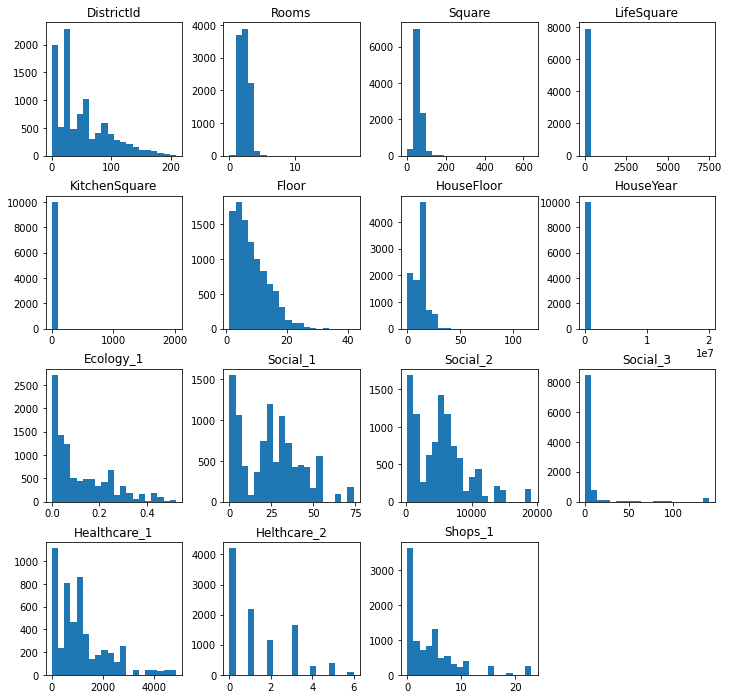

In [93]:
df_num_features.hist(figsize=(12,12), bins=20, grid=False);

### Processing of features

In this section some features will be transformed to remove anomalies and outliers

Adding of new temporary features for analyze outliers.

Temporary columns. Will be deleted after completing of preprocessing.

In the rows below each feature will be processed individually and regarding of result analyze optimal way for feature processing will be chosen.

**Rooms**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


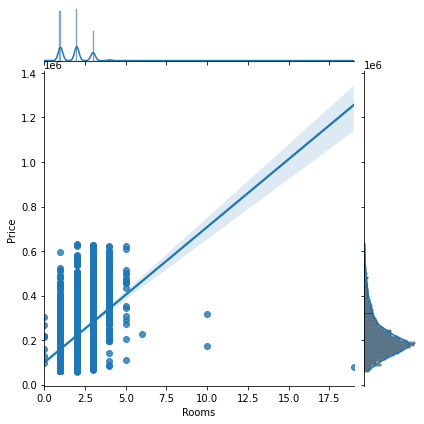

In [94]:
grid = sns.jointplot(df_fill['Rooms'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


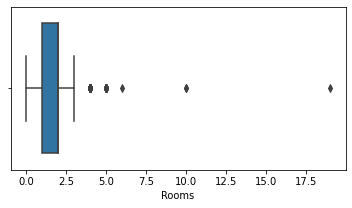

In [95]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Rooms'])
plt.xlabel('Rooms')
plt.show()

In [99]:
df_fill['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [100]:
df_fill['Rooms'].value_counts().sort_values()

6.0        1
19.0       1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

All appartmets where rooms have zero value will be changed to 1

Resolving of outliers cases:
   - All values which are less than 1 will be converted to 1.0
   - All values which are greater or equal to five or six will be converted to median value. 

**Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


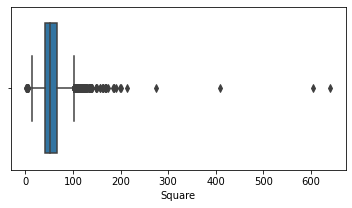

In [102]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Square'])
plt.xlabel('Square')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


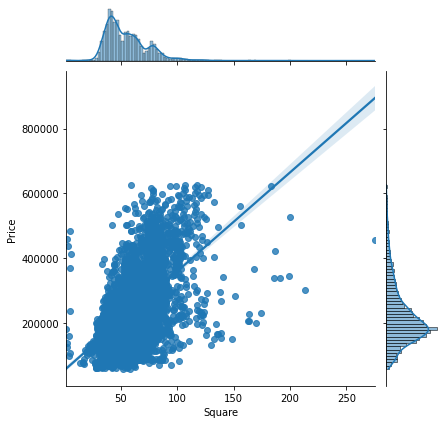

In [138]:
grid = sns.jointplot(df_num_features['Square'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [139]:
df_num_features[df_num_features['Square'] < 20].count()

DistrictId       20
Rooms            20
Square           20
LifeSquare       20
KitchenSquare    20
Floor            20
HouseFloor       20
HouseYear        20
Ecology_1        20
Social_1         20
Social_2         20
Social_3         20
Healthcare_1     10
Helthcare_2      20
Shops_1          20
Price            20
dtype: int64

Square column will be left without changes

**Life square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


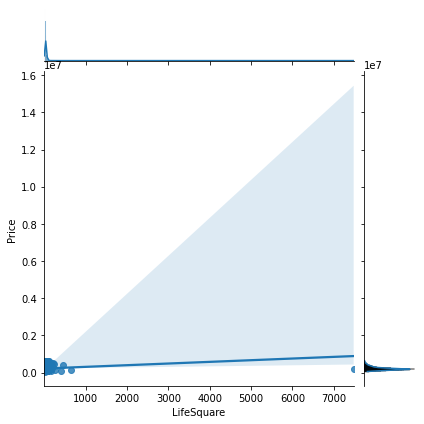

In [117]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


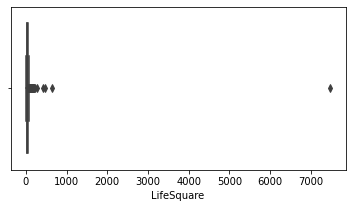

In [118]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [121]:
df_num_features = df_num_features[df_num_features['LifeSquare'] < 250]

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


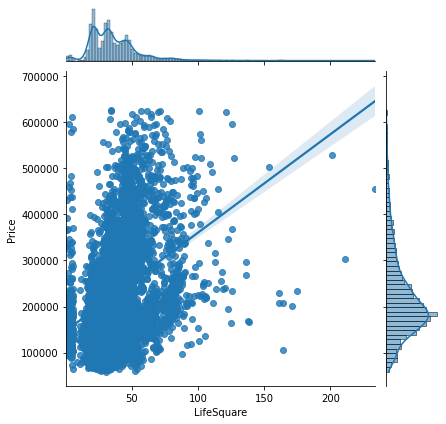

In [122]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


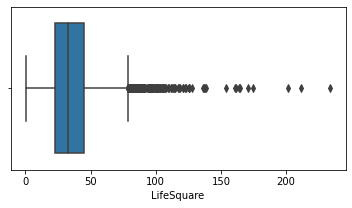

In [123]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [131]:
df_num_features[df_num_features['LifeSquare'] < 5].count()

DistrictId       162
Rooms            162
Square           162
LifeSquare       162
KitchenSquare    162
Floor            162
HouseFloor       162
HouseYear        162
Ecology_1        162
Social_1         162
Social_2         162
Social_3         162
Healthcare_1      76
Helthcare_2      162
Shops_1          162
Price            162
dtype: int64

In [132]:
df_fill['LifeSquare'].isnull().sum()

2113

In [133]:
df_fill[df_fill['LifeSquare'] > df_fill['Square']]['LifeSquare'].count()

482

In [134]:
df_fill[df_fill['LifeSquare'] == 0]['LifeSquare'].count()

0

Resolving of outliers:
- if LifeSquare is NaN or LifeSquare > Square, then LifeSquare will be changed to difference between Square and KitchenSquare and median difference between these differences.

**Kitchen Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


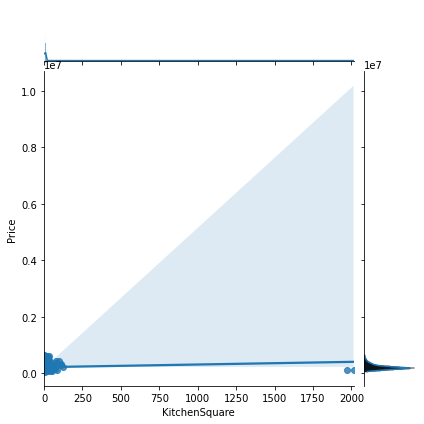

In [106]:
grid = sns.jointplot(df_fill['KitchenSquare'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


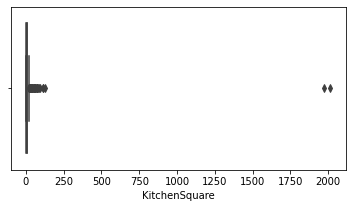

In [107]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.show()

In [ ]:
# df_fill['KitchenSquare'].value_counts().sort_values()
df_fill['KitchenSquare'].describe()

In [ ]:
df_fill[(df['KitchenSquare'] > 80)]['KitchenSquare'].count()

In [ ]:
df_fill[(df['KitchenSquare'] > df_fill['LifeSquare'])]['KitchenSquare'].count()

Resolving of outliers:
- If Kitchen square > 100 it will be converted to median value
- If Kitchen square < 3 it will be converted to 3
- if Kitchen square > general square it will be converted to 3

**Floor and house floor**

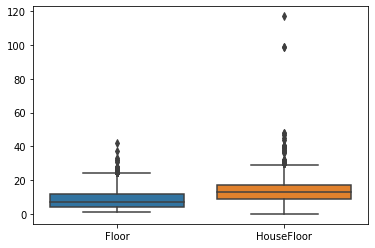

In [140]:
ax = sns.boxplot(data = df_fill[['Floor', 'HouseFloor']]                )
plt.show()

In [141]:
df_fill[df_fill['Floor'] == 0]['Floor'].count()

0

In [142]:
df_fill[df_fill['HouseFloor'] == 0]['HouseFloor'].count()

269

In [143]:
df_fill[(df_fill['HouseFloor'] < df_fill['Floor']) ]['Floor'].count()

1825

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


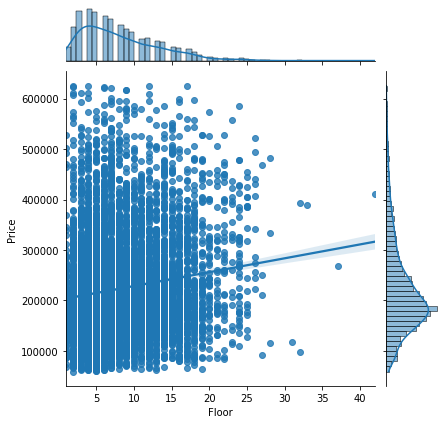

In [144]:
grid = sns.jointplot(df_num_features['Floor'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [147]:
df_num_features['Floor'][df_num_features['Floor'] == 0].count()

0

In [149]:
df_num_features['HouseFloor'][df_num_features['HouseFloor'] == 0].count()

54

In [150]:
df_num_features['HouseFloor'][df_num_features['Floor'] > df_num_features['HouseFloor']].count()

1208

Resolvong of outliers:
- if HouseFloor == 0, value will be changed to Floor (or to median value of whole dataset - optional to be compared with result score)
- if Floor > HouseFloor, value will be changed to HouseFloor

**HouseYear**

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['HouseYear'])
plt.xlabel('HouseYear')
plt.show()

In [ ]:
df_fill[df_fill['HouseYear'] == 0]['HouseYear'].count()

In [ ]:
df_fill[df_fill['HouseYear'] < 1900]['HouseYear'].count()

In [ ]:
df_fill[df_fill['HouseYear'] > 2021]['HouseYear'].count()

Resolvong of outliers:
- if year > 2021 it will be changed to median year

**Healthcare_1**

Due to big amount of NaN values in Healthcare_1 column, it can be dropped

### Applying of data clearing

In [32]:
dp = Data_preprocessing()

Function from section 3 will be applied to test dataset

In [33]:
df_fill.shape

(10000, 19)

In [34]:
dp.median_calculation(df_fill)

In [35]:
df_fill = dp.data_clearing (df_fill)

In [36]:
df_fill = dp.null_populating_hc(df_fill)

In [37]:
df_fill = dp.null_populating_ls(df_fill)

In [38]:
df_fill = dp.district_id_processing(df_fill)

In [39]:
df_fill.shape

(10000, 21)

In [40]:
df_fill.isnull().sum()

DistrictId                   0
Rooms                        0
Square                       0
LifeSquare                   0
KitchenSquare                0
Floor                        0
HouseFloor                   0
HouseYear                    0
Ecology_1                    0
Ecology_2                    0
Ecology_3                    0
Social_1                     0
Social_2                     0
Social_3                     0
Healthcare_1                 0
Helthcare_2                  0
Shops_1                      0
Shops_2                      0
Price                        0
hl_pd                     1884
Avg_Price_per_district       0
dtype: int64

In [ ]:
df_fill['hl_pd'] = df_fill['hl_pd'].fillna(df_fill['hl_pd'].median())

In [41]:
df_fill = df_fill.drop('hl_pd', axis = 1)

In [42]:
df_fill = df_fill.drop('DistrictId', axis = 1)

In [ ]:
df_fill.isnull().sum()

In [ ]:
df_fill.shape

In [ ]:
df_fill.describe()

Save dataframe to pickle file.

In [ ]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

In [ ]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

### Processing of categorial variables

There are three categorial columns in the dataset:
- Ecology_2
- Ecology_3
- Shops_2

Each columns can have ony one of two values and do not contain any null values.

In [244]:
df_cat_features = df_fill.select_dtypes(include=['object', 'category'])

In [245]:
df_cat_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [246]:
df_cat_features['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [247]:
df_cat_features['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [248]:
df_cat_features['Shops_2'].unique()

array(['B', 'A'], dtype=object)

<ipython-input-249-e8200df81e79>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


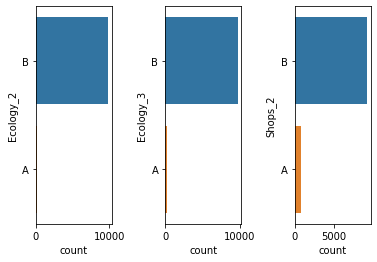

In [249]:
fig, ax =plt.subplots(1,3)
fig.subplots_adjust(wspace=0.7, hspace=0.7)
sns.countplot(y = 'Ecology_2',data = df_cat_features, ax=ax[0])
sns.countplot(y = 'Ecology_3',data = df_cat_features, ax=ax[1])
sns.countplot(y = 'Shops_2',data = df_cat_features, ax=ax[2])
fig.show()

In [ ]:
df_cat_features['Ecology_2'].value_counts()

Categorial values will b converted to numerical using get_dummies metgod.

As a result of applying this method new columns in the dataset will be added.

In [250]:
df_fill = pd.get_dummies(df_fill, columns = df_cat_features.columns)

In [251]:
df_fill.shape

(10000, 24)

In [252]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,hl_pd,Avg_Price_per_district,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,11,184966.930730,35.0,219720.0,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,16,300009.450063,41.0,225919.0,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,...,3,220925.908524,53.0,255736.0,0,1,0,1,0,1
5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,...,5,175616.227217,58.0,162287.0,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,4,150226.531644,99.0,184157.0,0,1,0,1,0,1


In [253]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,hl_pd,Avg_Price_per_district,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,...,11,184966.930730,35.0,219720.0,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,...,16,300009.450063,41.0,225919.0,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,...,3,220925.908524,53.0,255736.0,0,1,0,1,0,1
5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,...,5,175616.227217,58.0,162287.0,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,...,4,150226.531644,99.0,184157.0,0,1,0,1,0,1


In [254]:
df_fill.dtypes

DistrictId                  int64
Rooms                     float64
Square                    float64
LifeSquare                float64
KitchenSquare             float64
Floor                     float64
HouseFloor                float64
HouseYear                 float64
Ecology_1                 float64
Social_1                    int64
Social_2                    int64
Social_3                    int64
Healthcare_1                 int8
Helthcare_2                 int64
Shops_1                     int64
Price                     float64
hl_pd                     float32
Avg_Price_per_district    float64
Ecology_2_A                 uint8
Ecology_2_B                 uint8
Ecology_3_A                 uint8
Ecology_3_B                 uint8
Shops_2_A                   uint8
Shops_2_B                   uint8
dtype: object

In [255]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

In [ ]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

# 5. Model creation and applying <a class='anchor' id='models'>

## Algorithms and Techniques

There are a lot of algorythms for solving of regression tasks:
   - linear regression
   - polynominal regression
   - Decision Tree Regressor
   - Random Forest Regressor
   - Gradient Boosting etc
**Linear regression**
One of the simplest algorythms. Sometimes it even is not counted as ML method.
Simpliest formula is:
Y = kx + b
and goal of algorithm is to find weights k and shift b to satisfy the best selected metric value.
Implementation of linear regression is based on appropriate module from sklearn.

**Decision Tree Regression**
This is more flexible and easiy to understand method. It allows to have results which more fit curve of target variable.


**Random Forest Regression**
Method based on Decision Tree method but it use relatively big amount of Decision Trees. They works with different set of features in different combinations. 
Selecting of value for target variable is performed via voting of different trees from ensemble.

**Gradient Boosting**
Method which is based on boosting - method of ensembles building where predictors are built consistently, not in paralleal like in RandomForest. Boosting uses idea that every next model will be learnt based on errors of previous model.


To split initial dataset for training and test datasets train_test_split from sklearn can be used.

For best supervised method selection following methods of price prediction will be applied:
2. Random Forest 
3. Gradient Boosting

After processing of all methods the best variant will be selected.

To determine of quality of model, following metrics will be used:
- R2 score
- mean absolute error
- mean squared error

### Metrics

    
ML metric - Mean Squared Error (**MSE**) 
    - MSE in direct ratio to RMSE и R^2
    - MSE  easy to optimize (take the derrivatives)   



Business metric - **R^2**, Root Mean Squared Error (**RMSE**)
    - Easy interpretable
    - easy to understand for business
    - R^2 can have velues from 0 to 1, if 1, all our predictions are ideal. It possible to say that r2 score describy accuracy of our model.

The best model will have max value of R2MSE for testdataset. 

 $$MSE = \frac{1}{n}  \sum{(y - y_{pred})^2}$$

$$RMSE = \sqrt{\frac{1}{n}  \sum{(y - y_{pred})^2}}$$

$$R^2 = 1 - \frac{\frac{1}{n}\sum{(y - y_{pred})^2}}{\frac{1}{n}\sum{(y - y_{mean})^2}}$$

Dataset for each model will be processed by following steps:
1. additional preprocessing which can be needed for this particular model
2. spliting training and testing 
3. perform machine learning and record training and testing scores

## CatBoost

**Import validation file**

In [256]:
df_real_cb = pd.read_csv("D:/Learning/GeekBrains/numpy and pandas/test.csv", index_col='Id')

**Processing validation dataset**

In [257]:
df_real_cb = dp.data_clearing (df_real_cb)

In [258]:
df_real_cb = pd.get_dummies(df_real_cb, columns = df_cat_features.columns)

In [259]:
df_real_cb = df_real_cb.drop('DistrictId', axis = 1)

**Applying model to dataset**

In [260]:
X_cb = df_fill.copy()

In [261]:
y_cb = X_cb['Price']

In [262]:
X_cb = X_cb.drop('Price', axis = 1)

In [263]:
X_cb = X_cb.drop('DistrictId', axis = 1)

**split dataset**

In [264]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.3, random_state = 4)

**selecting params and model applying**

In [62]:
params = {"iterations": range(40, 201, 20),
          "depth": range(2, 11, 1)          
          }

In [63]:
model_cb = CatBoostRegressor(loss_function="RMSE", verbose=False)

In [64]:
gcb = GridSearchCV(model_cb, params, 
                  scoring='r2', # r2 score metric 
                  cv=KFold(n_splits=5,   # k number of fold in cross validation
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )

In [267]:
index_no = []

In [268]:
index_no.append(X_cb.columns.get_loc('Ecology_2_A'))
index_no.append(X_cb.columns.get_loc('Ecology_3_A'))
index_no.append(X_cb.columns.get_loc('Shops_2_A'))

In [269]:
index_no.append(X_cb.columns.get_loc('Ecology_2_B'))
index_no.append(X_cb.columns.get_loc('Ecology_3_B'))
index_no.append(X_cb.columns.get_loc('Shops_2_B'))

In [270]:
index_no.sort()

In [271]:
index_no

[16, 17, 18, 19, 20, 21]

In [266]:
temp_cb_model = CatBoostRegressor(learning_rate = 0.1, iterations = 1200, depth = 8, eval_metric = 'R2')

In [273]:
temp_cb_model.fit(X_train_cb, y_train_cb, cat_features = index_no)

0:	learn: 0.1175798	total: 7.19ms	remaining: 8.62s
1:	learn: 0.2136260	total: 13.3ms	remaining: 7.99s
2:	learn: 0.2950712	total: 19.3ms	remaining: 7.69s
3:	learn: 0.3658346	total: 25.6ms	remaining: 7.64s
4:	learn: 0.4266695	total: 31.8ms	remaining: 7.61s
5:	learn: 0.4762272	total: 38.1ms	remaining: 7.58s
6:	learn: 0.5185930	total: 44.3ms	remaining: 7.54s
7:	learn: 0.5537455	total: 63.9ms	remaining: 9.53s
8:	learn: 0.5827022	total: 69.8ms	remaining: 9.24s
9:	learn: 0.6072092	total: 76ms	remaining: 9.04s
10:	learn: 0.6277014	total: 81.9ms	remaining: 8.85s
11:	learn: 0.6446906	total: 87.9ms	remaining: 8.7s
12:	learn: 0.6608230	total: 93.9ms	remaining: 8.57s
13:	learn: 0.6727663	total: 99.6ms	remaining: 8.44s
14:	learn: 0.6838596	total: 106ms	remaining: 8.35s
15:	learn: 0.6947382	total: 112ms	remaining: 8.26s
16:	learn: 0.7039810	total: 117ms	remaining: 8.18s
17:	learn: 0.7124730	total: 124ms	remaining: 8.11s
18:	learn: 0.7200989	total: 129ms	remaining: 8.04s
19:	learn: 0.7260330	total: 13

173:	learn: 0.8788256	total: 1.11s	remaining: 6.58s
174:	learn: 0.8790518	total: 1.12s	remaining: 6.57s
175:	learn: 0.8795248	total: 1.13s	remaining: 6.57s
176:	learn: 0.8798610	total: 1.14s	remaining: 6.58s
177:	learn: 0.8803548	total: 1.14s	remaining: 6.57s
178:	learn: 0.8805989	total: 1.15s	remaining: 6.56s
179:	learn: 0.8811610	total: 1.16s	remaining: 6.55s
180:	learn: 0.8815190	total: 1.16s	remaining: 6.54s
181:	learn: 0.8817669	total: 1.17s	remaining: 6.54s
182:	learn: 0.8823931	total: 1.17s	remaining: 6.53s
183:	learn: 0.8826215	total: 1.18s	remaining: 6.52s
184:	learn: 0.8832897	total: 1.19s	remaining: 6.51s
185:	learn: 0.8835235	total: 1.19s	remaining: 6.5s
186:	learn: 0.8837913	total: 1.2s	remaining: 6.49s
187:	learn: 0.8840914	total: 1.2s	remaining: 6.48s
188:	learn: 0.8847255	total: 1.21s	remaining: 6.47s
189:	learn: 0.8850336	total: 1.22s	remaining: 6.46s
190:	learn: 0.8854517	total: 1.22s	remaining: 6.45s
191:	learn: 0.8859061	total: 1.23s	remaining: 6.44s
192:	learn: 0.8

347:	learn: 0.9212116	total: 2.26s	remaining: 5.53s
348:	learn: 0.9212530	total: 2.26s	remaining: 5.52s
349:	learn: 0.9213938	total: 2.27s	remaining: 5.52s
350:	learn: 0.9216656	total: 2.28s	remaining: 5.51s
351:	learn: 0.9218208	total: 2.28s	remaining: 5.5s
352:	learn: 0.9219606	total: 2.29s	remaining: 5.5s
353:	learn: 0.9219669	total: 2.3s	remaining: 5.49s
354:	learn: 0.9220753	total: 2.3s	remaining: 5.49s
355:	learn: 0.9221128	total: 2.31s	remaining: 5.48s
356:	learn: 0.9223382	total: 2.32s	remaining: 5.47s
357:	learn: 0.9224119	total: 2.32s	remaining: 5.46s
358:	learn: 0.9225889	total: 2.33s	remaining: 5.46s
359:	learn: 0.9227852	total: 2.33s	remaining: 5.45s
360:	learn: 0.9229931	total: 2.34s	remaining: 5.44s
361:	learn: 0.9231159	total: 2.35s	remaining: 5.43s
362:	learn: 0.9232525	total: 2.35s	remaining: 5.42s
363:	learn: 0.9234439	total: 2.36s	remaining: 5.42s
364:	learn: 0.9236684	total: 2.36s	remaining: 5.41s
365:	learn: 0.9237914	total: 2.37s	remaining: 5.4s
366:	learn: 0.923

531:	learn: 0.9451119	total: 3.51s	remaining: 4.41s
532:	learn: 0.9451664	total: 3.52s	remaining: 4.41s
533:	learn: 0.9452174	total: 3.53s	remaining: 4.4s
534:	learn: 0.9452495	total: 3.54s	remaining: 4.4s
535:	learn: 0.9453007	total: 3.54s	remaining: 4.39s
536:	learn: 0.9453367	total: 3.55s	remaining: 4.38s
537:	learn: 0.9453863	total: 3.56s	remaining: 4.38s
538:	learn: 0.9454598	total: 3.56s	remaining: 4.37s
539:	learn: 0.9454710	total: 3.57s	remaining: 4.36s
540:	learn: 0.9455850	total: 3.57s	remaining: 4.35s
541:	learn: 0.9457584	total: 3.58s	remaining: 4.35s
542:	learn: 0.9458011	total: 3.58s	remaining: 4.34s
543:	learn: 0.9459741	total: 3.59s	remaining: 4.33s
544:	learn: 0.9460812	total: 3.6s	remaining: 4.33s
545:	learn: 0.9461440	total: 3.6s	remaining: 4.32s
546:	learn: 0.9462808	total: 3.61s	remaining: 4.31s
547:	learn: 0.9464240	total: 3.62s	remaining: 4.3s
548:	learn: 0.9465045	total: 3.62s	remaining: 4.29s
549:	learn: 0.9466666	total: 3.63s	remaining: 4.29s
550:	learn: 0.946

706:	learn: 0.9585764	total: 4.6s	remaining: 3.21s
707:	learn: 0.9586272	total: 4.6s	remaining: 3.2s
708:	learn: 0.9586517	total: 4.61s	remaining: 3.19s
709:	learn: 0.9587343	total: 4.62s	remaining: 3.19s
710:	learn: 0.9588142	total: 4.63s	remaining: 3.18s
711:	learn: 0.9589061	total: 4.63s	remaining: 3.17s
712:	learn: 0.9589992	total: 4.64s	remaining: 3.17s
713:	learn: 0.9590901	total: 4.64s	remaining: 3.16s
714:	learn: 0.9591251	total: 4.65s	remaining: 3.15s
715:	learn: 0.9592147	total: 4.66s	remaining: 3.15s
716:	learn: 0.9592582	total: 4.66s	remaining: 3.14s
717:	learn: 0.9593013	total: 4.67s	remaining: 3.13s
718:	learn: 0.9593382	total: 4.67s	remaining: 3.13s
719:	learn: 0.9594102	total: 4.68s	remaining: 3.12s
720:	learn: 0.9594634	total: 4.68s	remaining: 3.11s
721:	learn: 0.9595398	total: 4.69s	remaining: 3.1s
722:	learn: 0.9596089	total: 4.7s	remaining: 3.1s
723:	learn: 0.9596437	total: 4.7s	remaining: 3.09s
724:	learn: 0.9597061	total: 4.71s	remaining: 3.08s
725:	learn: 0.95973

871:	learn: 0.9671108	total: 5.67s	remaining: 2.13s
872:	learn: 0.9671756	total: 5.68s	remaining: 2.13s
873:	learn: 0.9672206	total: 5.68s	remaining: 2.12s
874:	learn: 0.9672842	total: 5.69s	remaining: 2.11s
875:	learn: 0.9673019	total: 5.7s	remaining: 2.11s
876:	learn: 0.9674009	total: 5.71s	remaining: 2.1s
877:	learn: 0.9674307	total: 5.71s	remaining: 2.09s
878:	learn: 0.9674782	total: 5.72s	remaining: 2.09s
879:	learn: 0.9675271	total: 5.72s	remaining: 2.08s
880:	learn: 0.9675876	total: 5.73s	remaining: 2.08s
881:	learn: 0.9676220	total: 5.74s	remaining: 2.07s
882:	learn: 0.9676579	total: 5.74s	remaining: 2.06s
883:	learn: 0.9677114	total: 5.75s	remaining: 2.06s
884:	learn: 0.9677603	total: 5.76s	remaining: 2.05s
885:	learn: 0.9678092	total: 5.76s	remaining: 2.04s
886:	learn: 0.9678905	total: 5.77s	remaining: 2.04s
887:	learn: 0.9679490	total: 5.78s	remaining: 2.03s
888:	learn: 0.9679834	total: 5.78s	remaining: 2.02s
889:	learn: 0.9680074	total: 5.79s	remaining: 2.02s
890:	learn: 0.

1049:	learn: 0.9740830	total: 6.96s	remaining: 995ms
1050:	learn: 0.9741076	total: 6.97s	remaining: 988ms
1051:	learn: 0.9741353	total: 6.98s	remaining: 982ms
1052:	learn: 0.9741452	total: 6.98s	remaining: 975ms
1053:	learn: 0.9741866	total: 6.99s	remaining: 968ms
1054:	learn: 0.9742224	total: 7s	remaining: 962ms
1055:	learn: 0.9742459	total: 7.01s	remaining: 955ms
1056:	learn: 0.9742619	total: 7.01s	remaining: 949ms
1057:	learn: 0.9742900	total: 7.02s	remaining: 942ms
1058:	learn: 0.9743306	total: 7.02s	remaining: 935ms
1059:	learn: 0.9743680	total: 7.03s	remaining: 929ms
1060:	learn: 0.9744079	total: 7.04s	remaining: 922ms
1061:	learn: 0.9744426	total: 7.04s	remaining: 915ms
1062:	learn: 0.9744872	total: 7.05s	remaining: 908ms
1063:	learn: 0.9745097	total: 7.05s	remaining: 902ms
1064:	learn: 0.9745319	total: 7.06s	remaining: 895ms
1065:	learn: 0.9745593	total: 7.07s	remaining: 888ms
1066:	learn: 0.9746008	total: 7.07s	remaining: 882ms
1067:	learn: 0.9746330	total: 7.08s	remaining: 87

In [272]:
%%time
gcb.fit(X_train_cb, y_train_cb, cat_features = index_no)

KeyboardInterrupt: 

In [ ]:
#train_pool = Pool(X_cb, y_cb, cat_features = [0, 2, 5])

In [ ]:
#test_pool = Pool(test_data, cat_features = [0, 2, 5])

In [ ]:
#model_cb.fit(X_train_cb, y_train_cb, [13, 14, 15, 16, 17, 18])

In [71]:
gcb.best_params_

{'depth': 7, 'iterations': 180}

In [72]:
gcb.best_score_

0.7637109016190744

In [73]:
best_cb_model = gcb.best_estimator_

**validation of train model**

In [74]:
y_pred_train_cb = best_cb_model.predict(X_train_cb)

In [274]:
y_pred_train_cb = temp_cb_model.predict(X_train_cb)

In [275]:
cb_r2_train_score = r2_score(y_pred_train_cb, y_train_cb)
cb_r2_train_score

0.9768154227054308

**validation of test model**

In [76]:
y_pred_test_cb = best_cb_model.predict(X_test_cb)

In [276]:
y_pred_test_cb = temp_cb_model.predict(X_test_cb)

In [277]:
cb_r2_test_score = r2_score(y_pred_test_cb, y_test_cb)
cb_r2_test_score

0.6756764413960413

**Predictions for validation dataset**

In [278]:
X_rl_cb = df_real_cb.copy()

In [279]:
y_pred_rl_cb = temp_cb_model.predict(X_rl_cb)

In [280]:
res_rl_cb = pd.Series(y_pred_rl_cb)

In [281]:
submission_rl_cb = X_rl_cb.index

In [282]:
frame_rl_cb = {'Id':submission_rl_cb, 'Price': res_rl_cb}

In [283]:
submission_result_rl_cb = pd.DataFrame(frame_rl_cb)

In [284]:
submission_result_rl_cb.shape

(5000, 2)

In [285]:
submission_result_rl_cb.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

# 6. Conclusions <a class='anchor' id='conclusions'>

**Dataset**

Initial and training datasets have big amount of features which do no have influence on prediction accuracy.
Also changing categorial variables using get_dummies function almost does not have influence on funal accuracy of predictions for this current dataset.
Big mount of NaN in some columns requires their population or complete removing of features with big amount of gaps in data.

**Model Selection**

Random Forest model has the best accuracy comparable accuracy　from all models applied.
Gradient boosting have slightly higher R2 score but for current dataset in can be relative to more sucessful set of metha parameters.



**Potential ways for result improvement**

Available ways for r2 scorw increasing:
- improve process of feature preprocessing
- use regularisation of features insted of normalisation
- try to use PCA dimensional reducing
- use more efficeiant models like xgboosting

In [ ]:
# s = pd.Series([_ for _ in range(1, result.shape[0] + 1)])
# result.set_index(s)

In [ ]:
gc.collect